## Setup

### Imports

In [ ]:
import numpy as np #libraries
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
!pip install wandb #install weights and biases
import wandb as wb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [ ]:
def plot(x): #this plot function will allow us to plot both numpy arrays and torch tensors
    if type(x) == torch.Tensor : #if we have a torch tensor we change it to a numpy array
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots() #and we set the defaults for matplotlib
    im = ax.imshow(x, cmap = 'gray') #gray colormap
    ax.axis('off') #axis off
    fig.set_size_inches(5, 5) #size
    plt.show() #show the plot

In [ ]:
def montage_plot(x): #this function pads the second and third dimensions of our an array with constant values
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
b = 1000 #we set a univeral b for our batch size

def get_batch(mode): #let's make a function to train on data or guess unknown data
    if mode == "train": #training mode
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test": #guess mode
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y #return our guesses


## MNIST
    

### Load Data

In [ ]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy() #we will change our MNIST objects to numpy arrays
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255 #we'll divide them by 255 to get decimal form for matplotlib plotting
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape #size of X

(60000, 1, 28, 28)

In [ ]:
Y[50000] #in our set of answers, we see that the 50,000th index of X should be a three

3

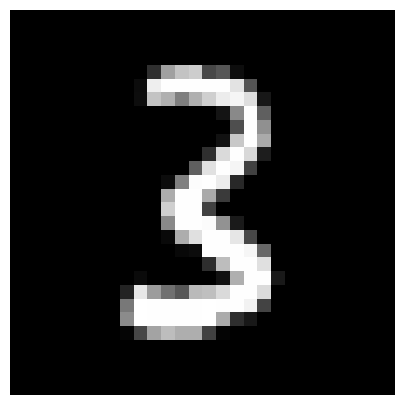

In [ ]:
plot(X[50000,0,:,:]) #we can plot x to see what it looks like, and it is a three

In [ ]:
Y[100] #the 100th image should be a 5

5

In [ ]:
X.shape #again we look at our indeces for X

(60000, 1, 28, 28)

In [ ]:
X[0:25,0,:,:].shape #we see that we have 25 28x28 images in the first 25 indeces of X

(25, 28, 28)

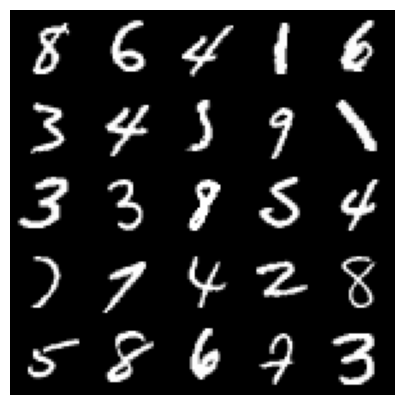

In [ ]:
montage_plot(X[125:150,0,:,:]) #we plot them all together using our montage plot function from earlier

In [ ]:
X.shape[0] #there are 60000 pictures in our X

60000

In [ ]:
X_test.shape #we only use the first 10,000 for our test

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
def GPU(data): #these functions will change our numpy arrays to torch tensor objects, one for gradient data and one for non-gradient
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
X = GPU_data(X) #let's convert our numpy arrays to tensor objects using the functions we defined
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X = X.reshape(X.shape[0],784)  #we flatten them both into vectors
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape #this will allow us to use the classifier

torch.Size([60000, 784])


### Classifier


In [ ]:
x,y = get_batch('train') #we'll get another batch using the function we defined earlier, and it will have our specified batch size

In [ ]:
x.shape #the size of our batch

torch.Size([1000, 784])

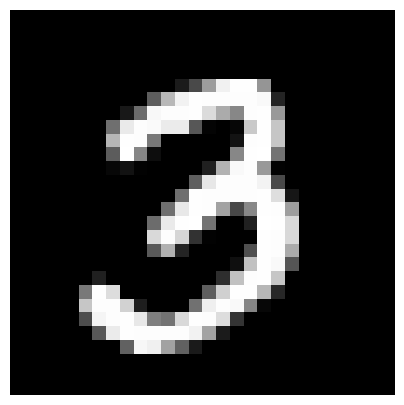

In [ ]:
plot(x[0].reshape(28,28)) #we will unflatten and plot the first image

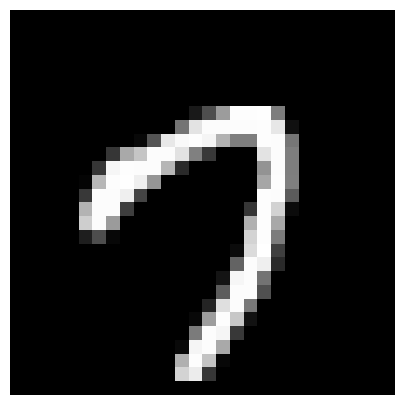

In [ ]:
plot(x[1].reshape(28,28)) #second image

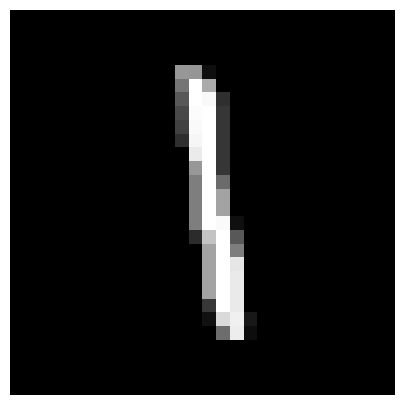

In [ ]:
plot(x[2].reshape(28,28)) #third image

In [ ]:
y[:10] #now we see what the first 10 guesses of our y

tensor([4., 7., 1., 5., 1., 9., 2., 6., 0., 9.], device='cuda:0')

In [ ]:
W = GPU(np.random.randn(784,10)) #we'll make 10 normally distributed random matrixes and convert them to torch tensors

In [ ]:
x.shape, W.shape #because the second and first dimensions match, we can do matrix multiplication on them

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape #what is the size if we multiply the matrices?

torch.Size([1000, 10])

In [ ]:
(x@W).shape #@ is shortcut for matrix multiplication

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W #we see how quickly the gpu can perform even this massive matrix multiplication

20.7 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
x@W #now we look at the resulting matrix

tensor([[  8.9506,   7.3626, -17.9945,  ...,  10.1953,  -9.3633,  -0.1266],
        [ -3.9791,   5.0221,  -2.7159,  ...,   1.4718,  -9.0906,  -6.1836],
        [ -2.5945,  -2.2181,  -9.8407,  ...,   4.5728, -11.2021,  -0.4675],
        ...,
        [-13.1419,   1.6358, -14.9025,  ...,   1.6862, -13.8508,  -2.4516],
        [ -2.0718,   4.4217,   1.3750,  ...,   8.0234, -12.4021,  -5.9788],
        [ -5.6316,  -2.6341,   4.3957,  ...,  -0.6117,  -7.3854,  -4.0275]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W #lets save it to a variable

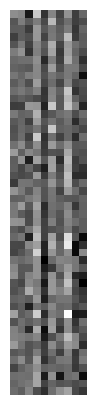

In [ ]:
plot(y2[:50]) #plotting the first 50 rows in our results matrix we see that its a set of random values

In [ ]:
y #our answer key

tensor([4., 7., 1., 5., 1., 9., 2., 6., 0., 9., 0., 4., 5., 7., 1., 7., 3., 9.,
        2., 9., 3., 5., 6., 8., 1., 3., 7., 4., 7., 4., 5., 3., 4., 2., 0., 0.,
        0., 1., 7., 2., 6., 3., 2., 4., 3., 5., 1., 6., 1., 7., 0., 8., 1., 0.,
        9., 1., 8., 2., 1., 3., 0., 4., 9., 7., 1., 8., 7., 9., 6., 0., 0., 1.,
        2., 2., 4., 3., 5., 4., 5., 6., 7., 7., 6., 0., 8., 8., 0., 7., 3., 8.,
        3., 9., 5., 1., 6., 4., 6., 5., 1., 1., 6., 6., 8., 7., 1., 3., 1., 2.,
        5., 9., 1., 0., 2., 5., 6., 6., 0., 7., 6., 3., 9., 9., 6., 9., 2., 3.,
        8., 8., 7., 1., 0., 2., 5., 3., 0., 5., 6., 0., 6., 5., 0., 4., 8., 0.,
        0., 3., 0., 4., 8., 7., 6., 7., 0., 9., 1., 4., 6., 3., 5., 7., 3., 6.,
        8., 2., 4., 1., 1., 5., 7., 8., 8., 4., 2., 6., 3., 7., 8., 0., 3., 2.,
        1., 9., 4., 3., 3., 4., 2., 4., 6., 8., 5., 1., 5., 2., 2., 2., 4., 3.,
        2., 1., 7., 7., 8., 3., 9., 4., 1., 5., 7., 1., 8., 9., 8., 8., 8., 1.,
        0., 1., 5., 0., 9., 2., 4., 7., 

In [ ]:
y.shape #we see that the size of the key for the batch is 1000

torch.Size([1000])

In [ ]:
def one_hot(y): #we'll make a function to store our guesses in a "one-hot vector" a vector which stores the values in a binary fashion
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1 #this line sets each value in our vector to a binary representation of the answer key for our batch (0-10)
    return y2 #y2 ends up being a matrix which is 10 (number of possibilities) by 1000 (batch size) answer key

In [ ]:
one_hot(y) #now instead of having the values represented in our key we have the positional representation of what each image represents numerically

<ipython-input-38-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
torch.argmax(y2,1) #this will return the highest value correlation in our matrix multiplication result

tensor([3, 5, 3, 7, 5, 5, 7, 5, 3, 3, 7, 7, 5, 3, 3, 5, 3, 5, 7, 7, 7, 7, 7, 7,
        3, 3, 3, 0, 3, 7, 7, 3, 3, 7, 7, 7, 2, 3, 5, 7, 5, 3, 7, 0, 7, 3, 3, 3,
        3, 7, 5, 7, 3, 7, 5, 0, 7, 7, 3, 7, 7, 7, 3, 7, 3, 7, 3, 6, 5, 7, 7, 0,
        0, 7, 5, 3, 5, 5, 3, 8, 3, 0, 7, 7, 3, 3, 7, 7, 3, 7, 7, 7, 7, 0, 7, 5,
        3, 3, 3, 3, 7, 7, 5, 7, 3, 7, 3, 7, 5, 0, 3, 7, 7, 3, 3, 3, 7, 1, 0, 3,
        5, 7, 7, 5, 6, 3, 3, 7, 3, 3, 7, 7, 7, 7, 7, 3, 3, 7, 0, 7, 7, 5, 3, 7,
        7, 3, 5, 7, 3, 5, 0, 3, 7, 5, 3, 7, 5, 3, 1, 7, 5, 5, 3, 7, 3, 0, 3, 7,
        3, 7, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 5, 7, 3, 3, 3, 8, 7, 7, 3, 7, 5, 0,
        5, 7, 7, 7, 3, 7, 0, 3, 3, 3, 7, 7, 5, 7, 3, 7, 5, 3, 3, 7, 7, 3, 7, 0,
        7, 0, 3, 7, 3, 7, 7, 5, 2, 3, 3, 7, 7, 7, 7, 7, 3, 7, 3, 0, 7, 7, 7, 7,
        3, 7, 7, 7, 3, 7, 7, 7, 7, 7, 7, 7, 3, 7, 3, 5, 5, 0, 3, 5, 3, 5, 7, 7,
        7, 7, 7, 0, 7, 7, 6, 3, 7, 3, 0, 8, 7, 5, 3, 3, 7, 3, 5, 5, 7, 7, 5, 0,
        7, 5, 7, 7, 7, 7, 7, 0, 3, 5, 3,

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b #we calculate our accuracy by seeing how close our y2 value is to the sum of our key divided by batch size
#we see the accuracy is near 10% as we're just randomly guessing

tensor(0.0890, device='cuda:0')

In [ ]:
X.shape #this is the full dataset

torch.Size([60000, 784])

In [ ]:
X@W

tensor([[  2.4150,  -9.3041,   2.2678,  ...,   2.2788,  -3.3525,  -2.1586],
        [ -5.2223,   1.7370,  -0.4901,  ...,  22.6241,   0.6255, -17.3633],
        [ 11.7900,   8.1169,   3.4437,  ...,   4.9776,   4.0090,  14.6905],
        ...,
        [  1.5532,   8.2267,  -9.3373,  ...,  -6.3725, -11.2003,   0.9299],
        [  2.4485,   4.3288, -17.8427,  ...,   9.1859,   4.0388,  -9.0019],
        [ -0.3791,   0.2381,  -0.8737,  ...,  14.9609,   4.8975, -10.4056]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
torch.argmax(X@W,1) #now we can multiply our entire dataset by our randomly generated weights

tensor([3, 7, 9,  ..., 5, 5, 7], device='cuda:0')

In [ ]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000 #the accuracy of doing the whole matrix is also near 10%, since the guesses are completely random

tensor(0.0959, device='cuda:0')

In [ ]:
X@W

tensor([[  2.4150,  -9.3041,   2.2678,  ...,   2.2788,  -3.3525,  -2.1586],
        [ -5.2223,   1.7370,  -0.4901,  ...,  22.6241,   0.6255, -17.3633],
        [ 11.7900,   8.1169,   3.4437,  ...,   4.9776,   4.0090,  14.6905],
        ...,
        [  1.5532,   8.2267,  -9.3373,  ...,  -6.3725, -11.2003,   0.9299],
        [  2.4485,   4.3288, -17.8427,  ...,   9.1859,   4.0388,  -9.0019],
        [ -0.3791,   0.2381,  -0.8737,  ...,  14.9609,   4.8975, -10.4056]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape #our weights need to be changed to get a more accurate result

torch.Size([784, 10])

In [ ]:
W[:,0].shape #each weight index has a size of 784, which is 28x28

torch.Size([784])

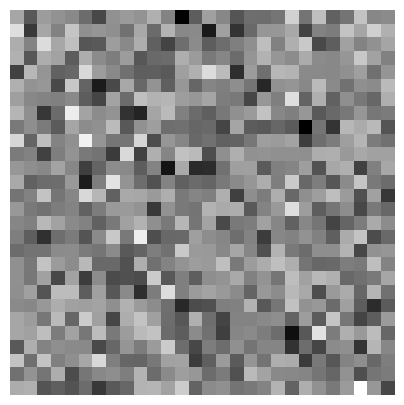

In [ ]:
plot(W[:,0].reshape(28,28)) #as we can see, this is currently what we are guessing that a zero looks like

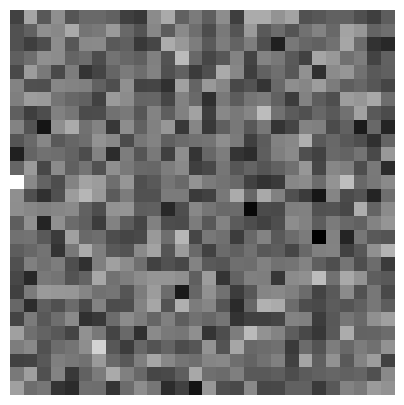

In [ ]:
plot(W[:,2].reshape(28,28)) #and this is what we think a two looks like

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

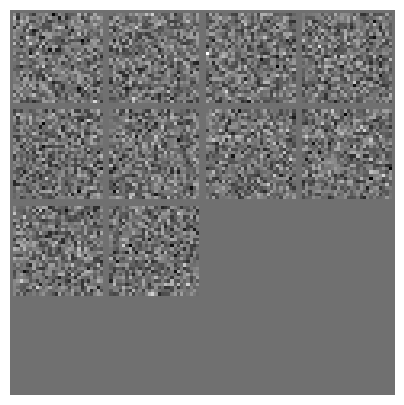

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy()) #these are our features for how each number looks in theory, as you can see not very accurate

In [ ]:
def softmax(x): #lets make a new softmax function so we can calculate our loss
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels): #defining our entropy helps us calculate our error
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def acc(out,y): #this function shows us what our accuracy is
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
def get_batch(mode): #the only difference between this function and the earlier batching function is we have a dynamic batch sizing
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w): #we can view our model of any given number by returning the first index of our matrix multiplication

    return x@w[0]

In [ ]:
def gradient_step(w): #gradient step will slowly correct our modelling based off of our error

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()

In [ ]:
def make_plots(): #using weights and biases we will train our network

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [ ]:
def Truncated_Normal(size): #same truncated normally generated randomizer as the last lab

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-38-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


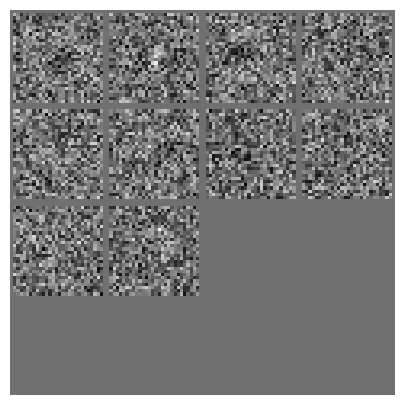

acc_test,▁▁▂▃▂▃▅▄▅▅▄▅▆▆▆▆▆▆▇▇▇▇▇▇█▇▇▇██▇██▇█▇█▇██
acc_train,▁▁▂▂▃▃▃▄▅▅▅▅▅▆▇▆▇▇▆▇▇▇▇█▇▇██▇█▇███████▇█
acc_test,0.62695
acc_train,0.58984


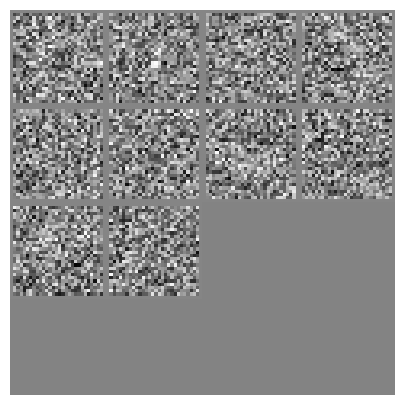

acc_test,▁▂▂▃▄▆▅▅▅▇▆▆▆▇▇▇▆█▇▇▇▇███████▇███▇█▇████
acc_train,▁▁▂▃▄▄▅▅▆▆▆▆▇▆▆▇▇▆▇▇▇▇██▇▇▇██▇▇▇█▇▇▇▇███
acc_test,0.44336
acc_train,0.4873


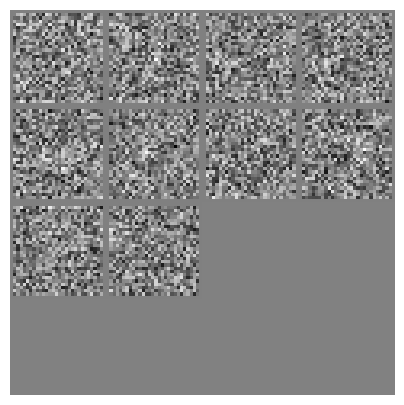

In [ ]:
for run in range(3): #lets run our data 3 times and see how much the modelling improves

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

acc_test,▁▂▃▄▅▅▆▆▆▆▆▇▇▆▇▆▇▆▇▇▇▇▇▇█▇█▇▇▇▇▇████▇█▇▇
acc_train,▁▂▃▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇██▇██▇▇█▇█
acc_test,0.43555
acc_train,0.4873


<ipython-input-38-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


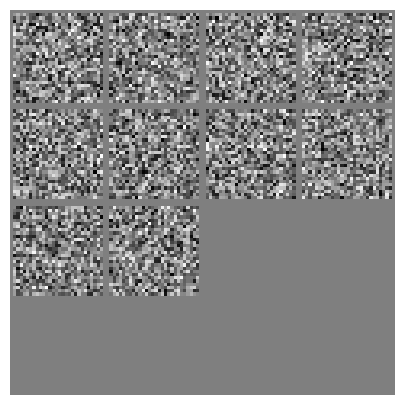

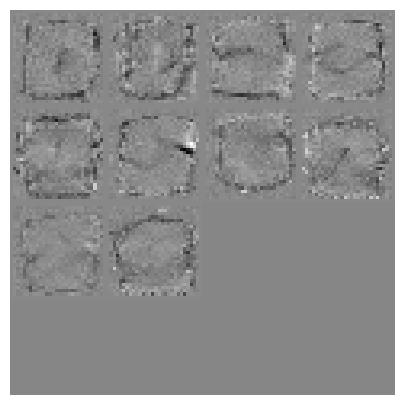

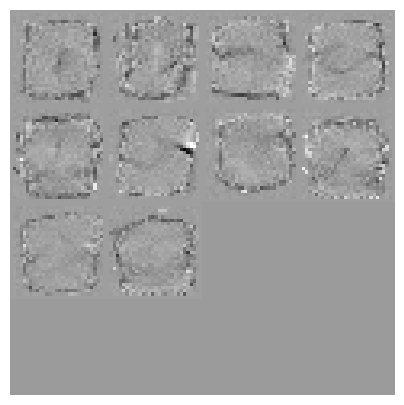

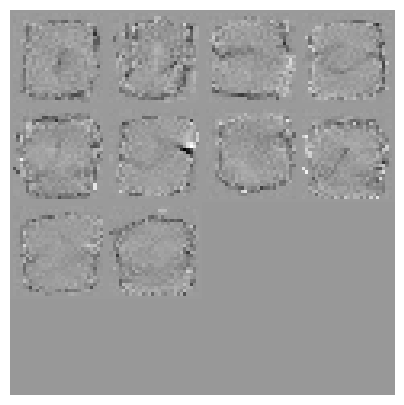

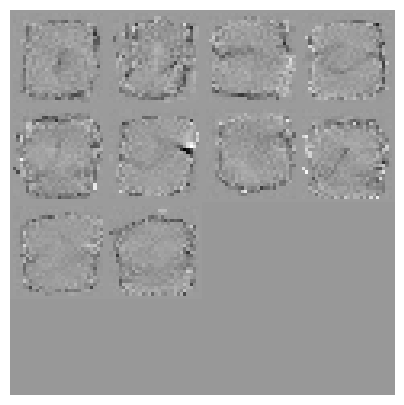

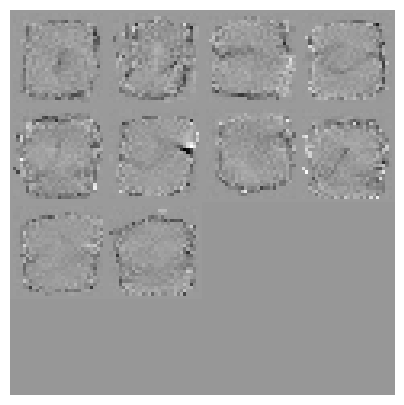

KeyboardInterrupt: 

In [ ]:
for run in range(100): #doesn't get much better with only three runs, but will 100 improve it more?

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
def get_batch(mode): #we'll set our batch size to the very common 1024
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
import torchvision #torch vision helps us visualize our data
from torch.nn.functional import *

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5) #let's normalize the data so its easier to compare
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
def Encoder(x,w): #the encoder will matmul the feature across each image 2 pixels at a time
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1))) #horizontally
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1))) #vertically
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x #we return the featuremap, which will eventually become a vector

In [ ]:
def Decoder(x,w): #decoder takes our vectors and turns them back into tensor images
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1))) #we essentially do the exact inverse of our encoder function
    return x #return the tensor

In [ ]:
def Autoencoder(x,w): #we'll see that we lose some data doing this, but it will give us a better feature to use over time
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000 #lets define how many steps we'll take in our training, batch size, and learning rate, which determines how far the line of best fit moves from its previous position with each new step
batch_size = 512
learning_rate = 1e-3

In [ ]:
from scipy import stats #more libraries
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5] #we'll get our random weights matrices into one big tensor

optimizer = torch.optim.Adam(params=w, lr=learning_rate) #we'll use the built in optimizer with our set learning rate and weights

for i in range(num_steps): #now lets train our network, and use the autoencoder to see our generated images

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2) #now the difference between our fake and real squared gives us the loss function

    optimizer.zero_grad() #turn off gradient
    loss.backward() #now we back propogate the loss (this updates our weights)
    optimizer.step() #and we move forward in the steps

    if i % 100 == 0: print(loss.item()) #every 100 steps we print our loss

1.1160147190093994
0.1512882113456726
0.11360234767198563
0.10124412924051285
0.09188500791788101
0.08502751588821411
0.07908689975738525
0.07630980759859085
0.0744905099272728
0.06846427172422409


In [ ]:
image_batch,y = get_batch('test') #we see the loss is lower as time progresses

In [ ]:
image_batch_recon = Autoencoder(image_batch,w) #we'll get a new batch and using our updated weights after the training, we'll autoencode the batch (with unknown results)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2) #our loss is around 7%

tensor(0.0721, device='cuda:0', grad_fn=<MeanBackward0>)

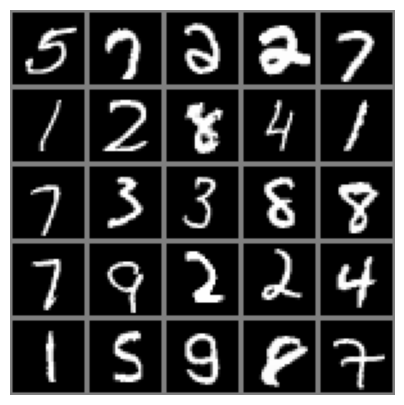

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy()) #now we plot the real batch

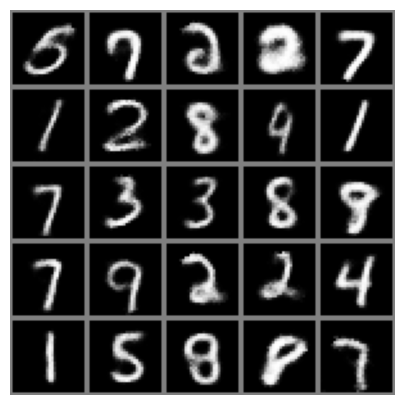

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy()) #and we see the batch our network generates with the autoencoder is similar to the original


### Generator



In [ ]:
latent_size = 64
hidden_size = 256 #set some default values
image_size = 784
b = 1024

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True) #lets get a different training set and test set
test_set = FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy() #we'll change them to numpy arrays so we can do our torch functions on them
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1024, 1, 28, 28])

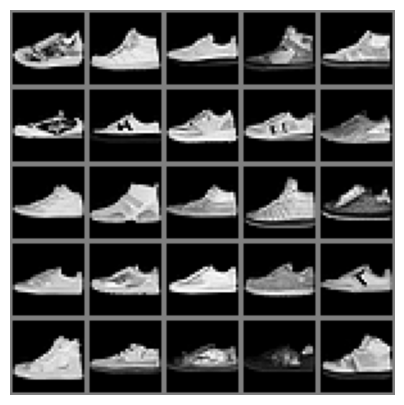

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 1024

In [ ]:
batch_size = b

In [ ]:
batch_size

1024

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

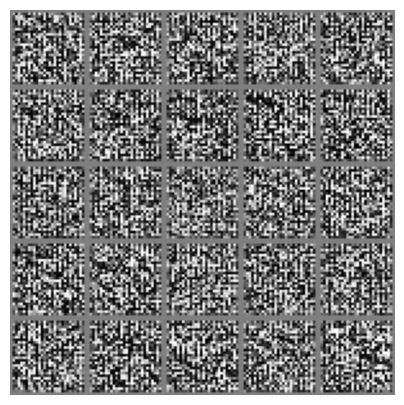

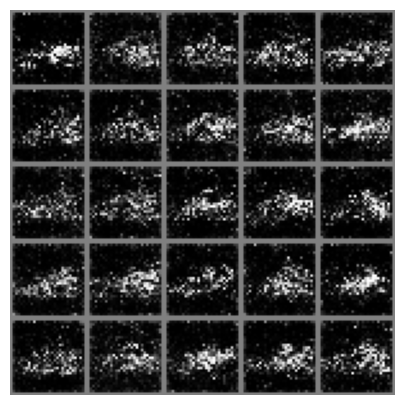

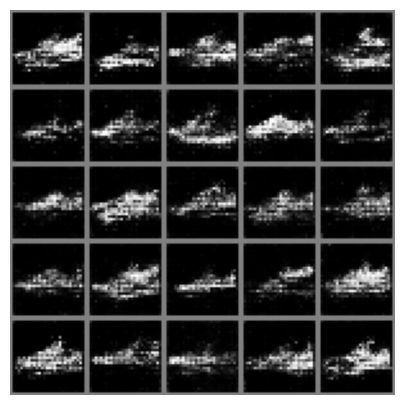

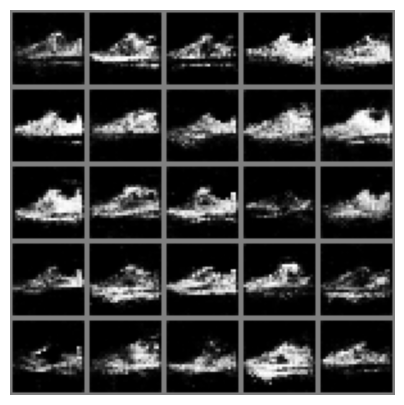

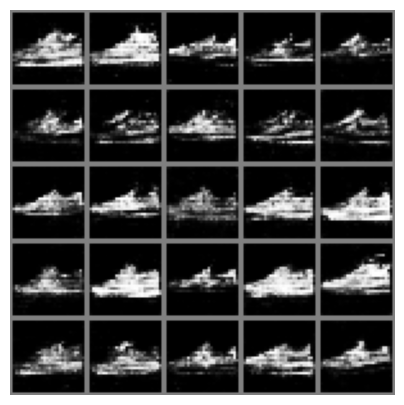

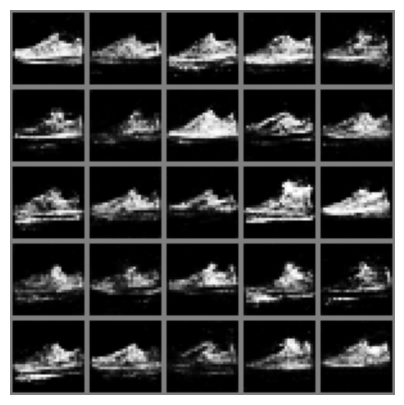

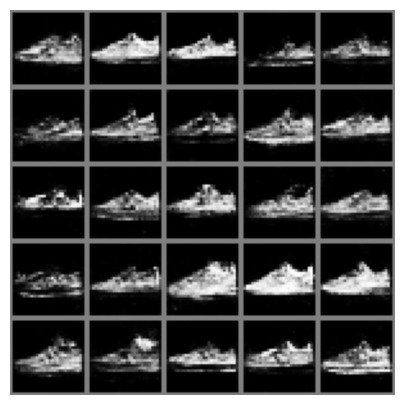

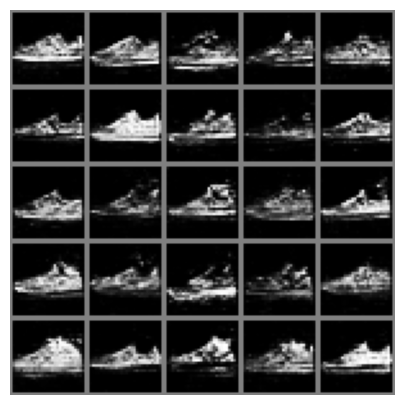

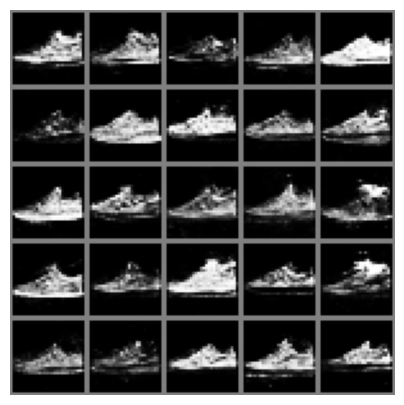

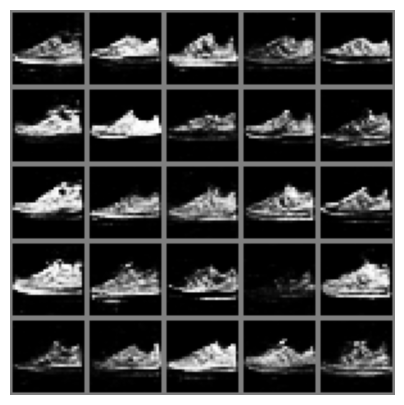

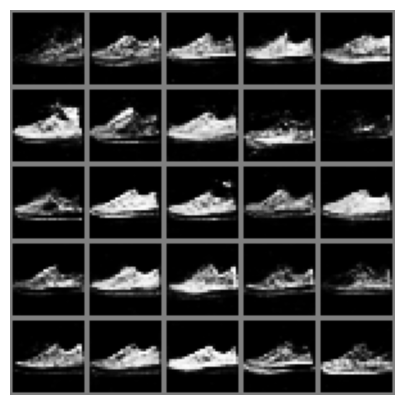

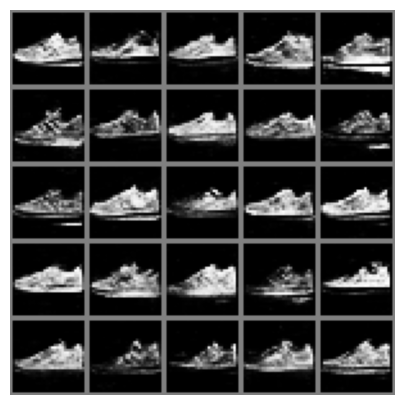

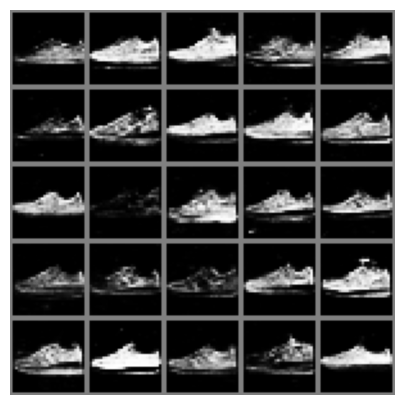

In [ ]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
z1[np.random.randint(steps)].shape

torch.Size([512, 64])

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

torch.Size([1, 1, 28, 28])

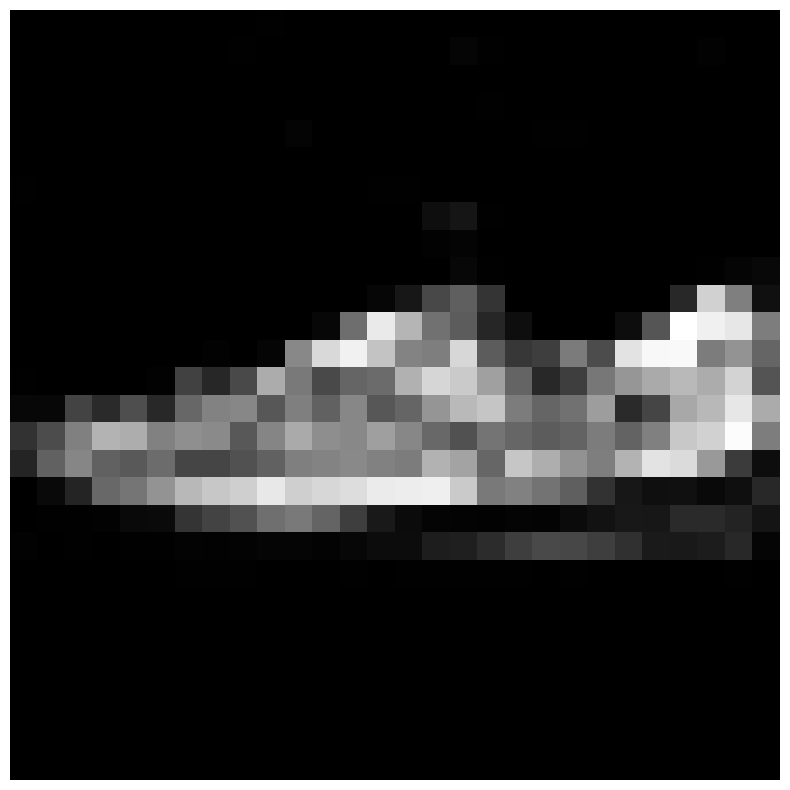

In [ ]:
plot(output[0,0]) #see how much our first index improved over time